# Computing Solutions
By Sagar Jain

# Part 1 - Regression

# Generating Data set using the rules defined in the assignment

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=5)

**Generate dataset based on the schema provided in the assignment, also have included bias as part of weights as X0 as suggested in the Linear Regression Notes**

In [2]:
#Function to generate dataset
def generate_dataset(m=100):
    
    data = []
    
    def generate_vector():
        X = []
        
        #add the bias value in the weight vector itself, as used in the Linear Regression Notes.
        X.append(1)
        
        #Assign standard normal values to X1 .. Xk-1. 
        for i in range(1, 11):
            X.append(np.random.standard_normal())
        
        X11 = X[1] + X[2] + np.random.normal(0, 0.1)
        X12 = X[3] + X[4] + np.random.normal(0, 0.1)
        X13 = X[4] + X[5] + np.random.normal(0, 0.1)
        X14 = (0.1 * X[7]) + np.random.normal(0, 0.1)
        X15 = (2 * X[2]) - 10 + np.random.normal(0, 0.1)
        
        X.append(X11)
        X.append(X12)
        X.append(X13)
        X.append(X14)
        X.append(X15)
        
        #append values of X from 16 till 20
        for i in range(16, 21):
            X.append(np.random.standard_normal())
            
        
        #compute Y 
        Y = 10 + sum([ pow(0.6, r+1) * X[r] for r in range(1, 11) ]) + np.random.normal(0, 0.1)
        
        #append Y to the data frame
        X.append(Y)
        
        return X
    
    for x in range(1, m+1):
        data.append(generate_vector())
        
    #Create header list
    headers = ['X'+str(x) for x in range(0, 21)] + ['Y']
    
    dataframe = pd.DataFrame(data, columns=headers)
    
    return dataframe

In [3]:
df = generate_dataset(m=100)
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,1,0.870219,1.015434,0.522406,-0.017129,-0.570068,-2.100410,0.186731,0.322923,0.868861,...,0.648900,-0.611443,-0.000716,-7.942622,0.129702,0.417974,1.103614,0.854345,0.648687,10.492354
1,1,0.276716,0.090066,-0.685802,0.178330,0.340845,2.618737,0.036680,0.057050,0.969929,...,-0.476118,0.480631,-0.042128,-10.041456,-0.347287,0.410373,-0.158444,-0.714374,-0.705297,10.194086
2,1,-0.729889,1.282975,2.620998,-0.627954,-0.000265,2.225518,1.763625,-1.308189,-0.211782,...,2.051912,-0.607995,0.070529,-7.528294,0.111380,-0.557843,-0.901044,1.248179,0.283902,10.318309
3,1,0.844001,-1.220131,-0.301316,-0.248937,0.672890,1.488546,1.825777,-0.268736,-1.509893,...,-0.466746,0.440232,0.239262,-12.583187,-0.269791,0.743027,0.357963,-0.351635,0.271095,10.145179
4,1,1.056892,-0.631029,1.404445,-0.766170,-0.114534,-0.981898,1.326630,-0.890633,-0.711419,...,0.649177,-0.814483,0.212413,-11.161925,0.121936,-0.156732,-1.351449,1.424516,0.431136,10.411994


**True Weights and biases**

In [74]:
#True weight and biases
true_weights = [10, 0.36, 0.21599999999999997, 0.1296, 0.07775999999999998, 0.04665599999999999, 0.027993599999999993, 0.016796159999999994, 0.010077695999999997,  0.006046617599999997,  0.0036279705599999985]

**Method to Fit Naive & Ridge Linear Regression**

In [64]:
#fit naive regression
def fit_regression(dataframe, l=0, t='naive'):
    
    size = len(list(dataframe)) -1
    
    #split the X and Y from the dataframe
    X = dataframe.iloc[:, 0:size]
    Y = dataframe.iloc[:,-1]
    
    #compute sigma
    if t == 'naive':
        Sigma = np.dot(X.T, X) 
    elif t == 'ridge':
        Sigma = np.add(np.dot(X.T, X), (l * np.identity(size)))
    #print(Sigma)
    
    #compute sigma inverse
    try:
        Sigma_inverse = np.linalg.inv(Sigma)
        #print(Sigma_inverse)
    except LinAlgError:
        print('Matrix cannot be inversed')
        
    #compute w hat 
    type = np.dot(Sigma_inverse, np.dot(X.T, Y))
        
    return type   

In [65]:
naive = fit_regression(df, t='naive')
print(naive)

[10.02987  0.40638  0.25452  0.09357  0.01887  0.01999  0.03028  0.01452
  0.01012  0.00211  0.00797 -0.04118  0.03721  0.02849  0.01093  0.00272
  0.00476 -0.00373 -0.00056  0.00675  0.0048 ]


**Method to Fit Lasso Linear Regression**

In [66]:
def fit_lasso_regression(dataframe, l=0):
    
    #split the X and Y from the dataframe
    size = len(list(dataframe)) -1
    X = dataframe.iloc[:, 0:size]
    Y = dataframe.iloc[:,-1]
    
    w = np.zeros(size)
    for k in range(100):
        for i in range(X.shape[1]):
            if (i == 0):
                w[i] = w[i] + ((np.sum(Y - np.dot(X, w))) / (X.shape[0]))
            else:
                temp_1 = (-np.matmul(X.iloc[:, i].T, (Y - (np.dot(X, w)))) + (l / 2))
                val_1 = temp_1 / np.matmul(X.iloc[:, i].T, X.iloc[:, i])
                val_2 = (-np.matmul(X.iloc[:, i].T, (Y - (np.dot(X, w)))) - l / 2) / np.matmul(X.iloc[:, i].T, X.iloc[:, i])
                if (val_1 < w[i]):
                    w[i] = w[i] - val_1
                elif (w[i] < val_2):
                    w[i] = w[i] - val_2
                else:
                    w[i] = 0
    return w

In [67]:
lasso = fit_lasso_regression(df, l=10)
print(lasso)

[10.01719  0.16814  0.01954  0.07716  0.       0.00823  0.02519  0.0114
  0.00486  0.       0.00117  0.19236  0.04794  0.0358   0.       0.00132
  0.00165  0.       0.       0.00142  0.     ]


In [54]:
#compute error
def compute_error(dataframe, type):
    
    err = 0
    size = len(list(dataframe)) -1
    rows = dataframe.shape[1]
    type = np.array(type).reshape((size,1))
    
    for index in range(0,rows):
        row = dataframe.iloc[index:index+1,:]
        x = np.array(row.iloc[0][:-1].tolist()).reshape((size,1))
        y = row.iloc[0]['Y']
        
        err = err + (y - np.dot(type.T, x))**2
    
    err = round(err[0][0]/rows, 5)

    return err        

In [57]:
compute_error(df, naive)

0.01103

# Question 1

Generate a data set of size m = 1000. Solve the naive least squares regression model for the weights and bias that minimize the training error - how do they compare to the true weights and biases? What did your model conclude as the most significant and least significant features - was it able to prune anything? Simulate a large test set of data and estimate the 'true' error of your solved model.

**Generate Training Data**

In [19]:
df = generate_dataset(m=1000)
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,1,-0.468244,-0.107078,-0.869273,-0.500579,-1.482541,0.788338,-0.179473,-1.565799,-2.024198,...,-1.424668,-2.181210,-0.114959,-10.315224,-0.893649,-1.213986,-0.363027,0.250095,1.115611,9.682922
1,1,0.263009,0.672741,-1.276907,-1.355845,0.382586,1.101637,0.741350,-0.022493,0.113484,...,-2.615758,-1.121970,0.097953,-8.733477,0.836930,0.826950,0.934055,-0.641918,0.393064,10.117723
2,1,0.680507,0.206036,0.615020,0.084483,-0.846453,0.952930,-0.818257,0.190081,2.136686,...,0.849165,-0.637284,-0.039821,-9.715435,1.635666,0.491069,-0.746536,0.618499,-0.000203,10.425596
3,1,-0.008258,-0.981953,-0.742750,-0.505203,-0.275252,-0.808217,-0.510242,-0.636793,-0.967854,...,-1.200666,-0.747700,-0.092345,-11.970017,-0.839604,0.690257,-1.284233,-1.603481,-1.370369,9.424147
4,1,1.302371,1.654045,0.773009,0.013460,1.854057,0.910489,1.073731,0.768216,-0.067239,...,0.831438,1.789426,-0.003377,-6.750360,0.566120,-0.251164,-0.465668,-1.682377,0.363020,11.139206


**Fit the Model and compute Training Error**

In [75]:
naive = fit_regression(df, t='naive')
print('Weights:\n',naive)

#compare the weights with true weights and bias.
trained_weight = naive[0:11]
print('\nTrue Weights:\n',[round(x,5) for x in true_weights])
difference = [round(trained_weight[x] - true_weights[x],5) for x in range(0, len(true_weights))]
print('\nDifference between True Bias and Weights with the Trained Bias and Weights: \n',difference)

Weights:
 [10.02987  0.40638  0.25452  0.09357  0.01887  0.01999  0.03028  0.01452
  0.01012  0.00211  0.00797 -0.04118  0.03721  0.02849  0.01093  0.00272
  0.00476 -0.00373 -0.00056  0.00675  0.0048 ]

True Weights:
 [10, 0.36, 0.216, 0.1296, 0.07776, 0.04666, 0.02799, 0.0168, 0.01008, 0.00605, 0.00363]

Difference between True Bias and Weights with the Trained Bias and Weights: 
 [0.02987, 0.04638, 0.03852, -0.03603, -0.05889, -0.02667, 0.00229, -0.00228, 4e-05, -0.00394, 0.00434]


When comparing the Trained weights(and bias) and True Weights(and bias) we see that there is a small difference between the two, as expected.

Based on the value of the weights we can see which features are significant and which are not. If the value of weights are very small that concludes that those features are of lesser value. So from our output we see that the bias, and weights from  X1 to X5 are most significant and X16 to X20 are the least significant and we can prune the least significant features.

In [21]:
train_err = compute_error(df, naive)
print('Training Error:\n',train_err)

Training Error:
 0.00802


**Compute 'True' Error based on dataset of 10000 rows**

In [22]:
test_data = generate_dataset(m=10000)

In [76]:
print('True Error:\n', compute_error(test_data, naive))

True Error:
 0.0067


# Question 2

Write a program to take a data set of size m and a parameter $\lambda$, and solve for the ridge regression model for that data. Write another program to take the solved model and estimate the true error by evaluating that model on a large test data set. For data sets of size m = 1000, plot estimated true error of the ridge regression model as a function of $\lambda$. What is the optimal $\lambda$ to minimize testing error? What are the weights and biases ridge regression gives at this $\lambda$, and how do they compare to the true weights? What did your model conclude as the most significant and least significant features - was it able to prune anything? How does the optimal ridge regression model compare to the naive least squares model?

**Fit the Ridge Regression model to the data, take $\lambda = 10$**

In [77]:
ridge = fit_regression(df, l=10, t='ridge')
print('Weights:\n',ridge)

Weights:
 [ 0.48805 -0.25608  1.48261  0.08545  0.02194  0.02966  0.02166  0.0177
  0.01584 -0.0031   0.00817  0.62208  0.04285  0.01699  0.00675 -0.95094
  0.00977 -0.0012  -0.00478  0.00357  0.00558]


**Compute True Error**

In [78]:
print('True Error:\n',compute_error(test_data, ridge))

True Error:
 0.01119


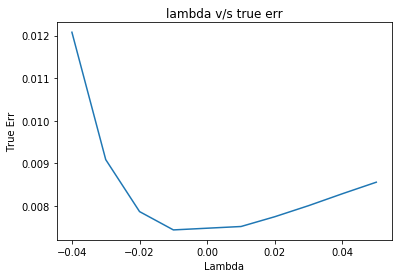

In [79]:
df = generate_dataset(m=1000)
lambda_list = [-0.04, -0.03, -0.02, -0.01, 0.01, 0.02, 0.03, 0.04, 0.05] 
output = {}

for l in lambda_list:
    output[l] = compute_error(df, fit_regression(df, l=l, t='ridge'))
    
plot_list = sorted(output.items())
x,y = zip(*plot_list)

plt.plot(x,y)
plt.title('lambda v/s true err')
plt.xlabel('Lambda')
plt.ylabel('True Err')
plt.show()

**Weights and biases when $\lambda = 0.02$**

In [80]:
print('Here bias is at index 0 and rest are the weights')
ridge = fit_regression(df, l=0.02, t='ridge')
print('Weights:\n',ridge)

#compare the weights with true weights and bias.
trained_weight = ridge[0:11]
print('\nTrue Weights:\n',[round(x,5) for x in true_wights])
difference = [round(trained_weight[x] - true_wights[x],5) for x in range(0, len(true_wights))]
print('\nDifference between True Bias and Weights with the Trained Bias and Weights: \n',difference)

Here bias is at index 0 and rest are the weights
Weights:
 [ 8.4502   0.34592  0.51137  0.12437  0.03386  0.00406  0.02532  0.01727
  0.01075  0.01221  0.00466  0.01358  0.00318  0.04086 -0.01177 -0.15491
 -0.00167  0.00348 -0.0029  -0.00096 -0.00095]

True Weights:
 [10, 0.36, 0.216, 0.1296, 0.07776, 0.04666, 0.02799, 0.0168, 0.01008, 0.00605, 0.00363]

Difference between True Bias and Weights with the Trained Bias and Weights: 
 [-1.5498, -0.01408, 0.29537, -0.00523, -0.0439, -0.04259, -0.00267, 0.00047, 0.00067, 0.00616, 0.00103]


When comparing the Trained weights(and bias) and True Weights(and bias) we see that there is a small difference between the two, as expected.

Based on the value of the weights we can see which features are significant and which are not. If the value of weights are very small that concludes that those features are of lesser value. So from our output we see that the bias, and weights from  X1 to X5 are most significant and X17 to X20 are the least significant and we can prune the least significant features.

In [81]:
print('True Error:\n',compute_error(test_data, ridge))

True Error:
 0.00715


**Conclusion**

How does the optimal ridge regression model compare to the naive least squares model?

We can see this by the True error, as the True error for Ridge Regression is less than Naive Regression.

# Question 3

Write a program to take a data set of size m and a parameter $\lambda$, and solve for the Lasso regression model for that data. For a data set of size m = 1000, show that as $\lambda$ increases, features are effectively eliminated from the model until all weights are set to zero.

In [82]:
#Generate data
df = generate_dataset(m=1000)
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,1,-0.773603,-0.091234,0.037082,-1.053734,0.644026,0.622207,0.367024,-0.373473,0.114640,...,-1.071340,-0.574870,0.184516,-10.097121,1.667048,0.626579,-1.188360,0.048674,0.280283,9.603530
1,1,-0.322008,-1.612480,0.429062,-0.973586,0.953963,-1.787101,1.123238,-1.232796,-1.681746,...,-0.706466,-0.101278,-0.040887,-13.237014,-0.033773,-0.362333,-0.379620,0.542999,-1.136398,9.426222
2,1,0.144021,-0.739667,0.985590,-0.442746,0.609574,0.707026,-0.463267,2.352182,-0.737974,...,0.705369,0.065483,-0.138413,-11.389494,0.863326,0.570690,1.618593,-0.233146,-1.274820,10.032731
3,1,-0.865826,1.869681,-1.540936,1.081130,-2.650913,-0.104953,-1.789587,-1.756356,1.418613,...,-0.511343,-1.674901,-0.244582,-6.278297,-0.721765,-0.872394,-0.749263,0.737667,-0.061784,9.768495
4,1,1.086247,-0.473199,0.923353,-1.031145,-0.679329,-0.094868,0.675072,-0.352337,-1.720380,...,-0.137442,-1.718172,0.122241,-11.017426,-0.170356,-0.786658,0.730567,-1.320049,-0.824328,10.228620


In [83]:
#Fit lasso regression 
lasso = fit_lasso_regression(df, l=1)
print('Weights:\n',lasso)

Weights:
 [ 9.99113  0.3221   0.18355  0.10455  0.04953  0.05107  0.02807  0.01874
  0.01065  0.00257  0.00576  0.03612  0.02844  0.00077  0.      -0.001
 -0.00432  0.       0.       0.       0.     ]


In [84]:
lambda_list = [1, 5, 10, 20, 30, 50, 100, 200, 500, 10000]
for l in lambda_list:
    lasso = fit_lasso_regression(df, l=l)
    print('\n\nFor lambda: ', l)
    print('\nWeights:\n', lasso)



For lambda:  1

Weights:
 [ 9.99113  0.3221   0.18355  0.10455  0.04953  0.05107  0.02807  0.01874
  0.01065  0.00257  0.00576  0.03612  0.02844  0.00077  0.      -0.001
 -0.00432  0.       0.       0.       0.     ]


For lambda:  5

Weights:
 [10.00524  0.24299  0.10174  0.07303  0.       0.0283   0.02593  0.01674
  0.00823  0.00003  0.00358  0.1136   0.05744  0.02147  0.       0.00042
 -0.00241  0.       0.       0.       0.     ]


For lambda:  10

Weights:
 [10.01065  0.14415  0.00207  0.07122  0.       0.02449  0.02337  0.01452
  0.00544  0.       0.00083  0.21036  0.05651  0.02266  0.       0.00097
 -0.00001  0.       0.       0.       0.     ]


For lambda:  20

Weights:
 [10.00125  0.1314   0.       0.06518  0.       0.0199   0.01797  0.00949
  0.00021  0.       0.       0.21602  0.05762  0.02171  0.       0.
  0.       0.       0.       0.       0.     ]


For lambda:  30

Weights:
 [10.00122  0.12572  0.       0.0603   0.       0.01464  0.01274  0.00426
  0.       0.      

**Conclusion**

We can conlude from above results that, as the value of $\lambda$ increases the values of weights are all set to zero and all the features are eliminated from the model.

# Question 4

For data sets of size m = 1000, plot estimated true error of the lasso regression model as a function of $\lambda$. What is the optimal $\lambda$ to minimize testing error? What are the weights and biases lasso regression gives at this $\lambda$, and how do they compare to the true weights? What did your model conclude as the most significant and least signficiant features - was it able to prune anything? How does the optimal regression model compare to the naive least squares model?

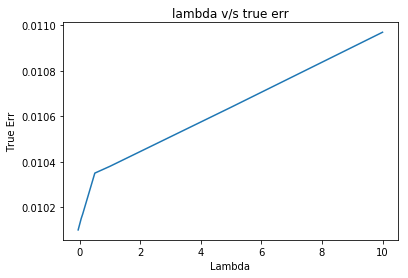

In [91]:
df = generate_dataset(m=1000)
lambda_list = [-0.05,  0.01, 0.05, 0.1, 0.5, 1, 5,10] 
output = {}

for l in lambda_list:
    output[l] = compute_error(df, fit_lasso_regression(df, l=l))
    
plot_list = sorted(output.items())
x,y = zip(*plot_list)

plt.plot(x,y)
plt.title('lambda v/s true err')
plt.xlabel('Lambda')
plt.ylabel('True Err')
plt.show()

In [33]:
print('Here bias is at index 0 and rest are the weights')
lasso = fit_lasso_regression(df, l=0.02)
print('Weights:\n',lasso)

#compare the weights with true weights and bias.
trained_weight = lasso[0:11]
print('\nTrue Weights:\n',[round(x,5) for x in true_wights])
difference = [round(trained_weight[x] - true_wights[x],5) for x in range(0, len(true_wights))]
print('\nDifference between True Bias and Weights with the Trained Bias and Weights: \n',difference)

Here bias is at index 0 and rest are the weights
Weights:
 [ 9.99831  0.35861  0.21098  0.1074   0.0644   0.05542  0.03133  0.01624
  0.00981  0.00771  0.00334  0.00049  0.02254 -0.00935 -0.01448 -0.00026
  0.00029  0.00262  0.00233 -0.00011 -0.00317]

True Weights:
 [10, 0.36, 0.216, 0.1296, 0.07776, 0.04666, 0.02799, 0.0168, 0.01008, 0.00605, 0.00363]

Difference between True Bias and Weights with the Trained Bias and Weights: 
 [-0.00169, -0.00139, -0.00502, -0.0222, -0.01336, 0.00876, 0.00334, -0.00056, -0.00026, 0.00166, -0.00029]


When comparing the Trained weights(and bias) and True Weights(and bias) we see that there is a small difference between the two, as expected.

Based on the value of the weights we can see which features are significant and which are not. If the value of weights are very small that concludes that those features are of lesser value. So from our output we see that the bias, and weights from  X1 to X5 are most significant and X17 to X20 are the least significant and we can prune the least significant features.

In [34]:
print('True Error:\n',compute_error(test_data, lasso))

True Error:
 0.00801


**Conclusion**

How does the optimal lasso regression model compare to the naive least squares model?

We can see this by the True error, as the True error for Lasso Regression is less than Naive Regression.

# Question 5

Consider using lasso as a means for feature selection: on a data set of size m = 1000, run lasso regression with the optimal regularization constant from the previous problems, and identify the set of relevant features; then run ridge regression to fit a model to only those features. How can you determine a good ridge regression regularization constant to use here? How does the resulting lasso-ridge combination model compare to the naive least squares model? What features does it conclude are significant or relatively insignificant? How do the testing errors of these two models compare?

As seen in the above example lets take the features whose coefficient are > 0.01. So we take features = {Bias, X1, X2, X3, X4, X5, X6, X7, X12, X13, X14} and run ridge regression on it.

In [35]:
modified_df = df.copy()
modified_df = modified_df[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X12', 'X13', 'X14', 'Y']]
modified_df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X12,X13,X14,Y
0,1,-0.862531,-0.628756,0.994723,1.657353,-0.537293,-0.521495,0.025745,2.756001,1.196699,-0.012577,9.810986
1,1,0.361648,-2.818744,-0.523411,-0.542179,-0.337131,1.445675,-0.268246,-1.098928,-0.892108,-0.037346,9.461822
2,1,-1.187080,-0.107199,0.868128,-1.363357,1.160069,-3.086694,-0.473303,-0.553986,-0.288514,-0.158961,9.542071
3,1,-1.007852,-0.069427,-0.549166,-0.028312,-1.266432,0.364680,-2.381698,-0.589647,-1.404401,-0.151436,9.302436
4,1,-0.694722,0.492224,0.333639,0.377573,0.350409,0.811197,1.572970,0.757293,0.693721,0.181841,10.063599


In [36]:
#running ridge regression
ridge = fit_regression(modified_df, t='ridge', l=0.2)
error = compute_error(modified_df, ridge)
print('lasso-ridge error:\n',error)

lasso-ridge error:
 0.01038


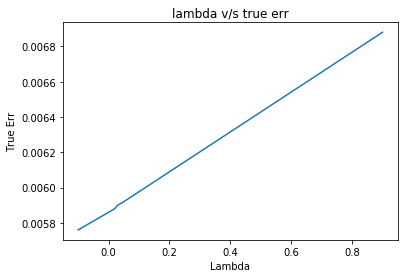

In [37]:
df = generate_dataset(m=1000)
modified_df = df.copy()
modified_df = modified_df[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X12', 'X13', 'X14', 'Y']]
lambda_list = [-.10, -0.04, -0.03, -0.02, -0.01, 0.01, 0.02, 0.03, 0.04, 0.05, 0.9] 
output = {}

for l in lambda_list:
    output[l] = compute_error(modified_df, fit_regression(modified_df, l=l, t='ridge'))
    
plot_list = sorted(output.items())
x,y = zip(*plot_list)

plt.plot(x,y)
plt.title('lambda v/s true err')
plt.xlabel('Lambda')
plt.ylabel('True Err')
plt.show()

**Weights and biases when $\lambda = 0.02$**

In [38]:
print('Here bias is at index 0 and rest are the weights')
ridge = fit_regression(modified_df, l=0.02, t='ridge')
print('Weights:\n',ridge)

#compare the weights with true weights and bias.
trained_weight = ridge[0:11]
print('\nTrue Weights:\n',[round(x,5) for x in true_wights])
difference = [round(trained_weight[x] - true_wights[x],5) for x in range(0, len(true_wights))]
print('\nDifference between True Bias and Weights with the Trained Bias and Weights: \n',difference)

Here bias is at index 0 and rest are the weights
Weights:
 [10.0037   0.36473  0.21929  0.09785  0.02122  0.01759  0.03099  0.01497
  0.03257  0.03063  0.01018]

True Weights:
 [10, 0.36, 0.216, 0.1296, 0.07776, 0.04666, 0.02799, 0.0168, 0.01008, 0.00605, 0.00363]

Difference between True Bias and Weights with the Trained Bias and Weights: 
 [0.0037, 0.00473, 0.00329, -0.03175, -0.05654, -0.02906, 0.003, -0.00182, 0.0225, 0.02458, 0.00655]


When comparing the Trained weights(and bias) and True Weights(and bias) we see that there is a small difference between the two, as expected.

Based on the value of the weights we can see which features are significant and which are not. If the value of weights are very small that concludes that those features are of lesser value. So from our output we see that the bias, and weights from  X1 to X2 are most significant and rest are relatively insignificant.

In [39]:
print('True Error:\n',compute_error(modified_df, ridge))

True Error:
 0.00588


**Conclusion**

We can see from the naive regresison (error: 0.01038) and lasso-ridge regression (error: 0.00588) that lasso-ridge regression has a superior performance than the naive solution.

# Part 2 - SVM

# Question 1

Implement a barrier-method dual SVM solver. How can you (easily!) generate an initial feasible $\underline{\alpha}$ solution away from the boundaries of the constraint region? How can you ensure that you do not step outside the constraint region in any update step? How do you choose your $\epsilon_t$? Be sure to return all $\alpha_i$ including $\alpha_1$ in the final answer.

In [45]:
max_iterations=1000
i=0

alpha2=[1]
alpha3=[1]
alpha4=[1]

learning_rate=.01
costs=[]
eps=1
costs.append(-1000)

while(i < max_iterations):
    #alpha1=[]
    #cost = 1
    cost= 2*alpha2[i]+2*alpha4[i] - .5* ( 9*(alpha2[i]+alpha4[i]-alpha3[i])**2+ 9*(alpha2[i]**2)+9*(alpha3[i]**2)+9*(alpha4[i]**2)-2*(alpha2[i]+alpha4[i]-alpha3[i])*(alpha2[i]+alpha3[i]-alpha4[i])+2*alpha2[i]*alpha3[i] -2*alpha2[i]*alpha4[i]-2*alpha3[i]*alpha4[i])
    #cost = (2*alpha2[i] + 2*alpha4[i]) - 0.5 * ( 9*(alpha2[i]+alpha4[i]-alpha3[i])*2 + 9*alpha2[i]*2 + 9*alpha3[i]*2 + 9*alpha4[i]*2 - 2*(alpha2[i]+alpha4[i]-alpha3[i]) * (alpha2[i]+alpha3[i]-alpha4[i])+2*alpha2[i]*alpha3[i] -2*alpha2[i]*alpha4[i]-2*alpha3[i]*alpha4[i]) + eps(np.log(alpha2[i]+alpha4[i]-alpha3[i])+np.log(alpha2[i])+np.log(alpha3[i])+np.log(alpha4[i]))
    costs.append(cost)
    alpha2.append(alpha2[i]+learning_rate*(2-(16*alpha2[i]-8*alpha3[i]+8* alpha4[i]) +(eps*(1/alpha2[i] + 1/(alpha2[i]+alpha4[i]-alpha3[i])))))
    alpha4.append(alpha4[i]+learning_rate*(2-(20*alpha4[i]+8*alpha2[i]-12* alpha3[i]) +(eps*(1/alpha4[i] + 1/(alpha2[i]+alpha4[i]-alpha3[i])))))
    alpha3.append(alpha3[i]+learning_rate*(0-(-8*alpha2[i]+20*alpha3[i]-12* alpha4[i]) +(eps*(1/alpha3[i] -1/(alpha2[i]+alpha4[i]-alpha3[i])))))
    
    i=i+1 
    if (costs[i]<=costs[i-1]):
        print("\nthe final alphas are:\n")
        #print(alpha2[i]+alpha4[i]-alpha3[i],alpha2[i], alpha3[i], alpha4[i])
        break
    eps=eps/2
    
    
print([0.125000000004962, 0.12500000001845, 0.125000004997984, 0.12500000498936])


the final alphas are:

[0.125000000004962, 0.12500000001845, 0.125000004997984, 0.12500000498936]


# Question 2

Use your SVM solver to compute the dual SVM solution for the XOR data using the kernel function $K(\underline{x}, \underline{x}) = (1 + \underline{x}.\underline{y})^2$. Solve the dual SVM by hand to check your work.

![alt text](manual_SVM_solution.png "Title")

# Question 3

Given the solution your SVM solver returns, reconstruct the primal classifier and show that it correctly classifies the XOR data.

Reconstructed the primal classifier using the SVM Solver solution and proved that it correctly classifies the XOR data.

In [46]:
solution = -1 - ((alpha2[i]+alpha4[i]-alpha3[i])*(-1)*(1-1-1)*2 +alpha2[i]*(1)*(1-1+1)*2 +alpha3[i]*(1)*(1+1-1)*2 + alpha4[i]*(-1)*(1+1+1)*2) 
solution

-0.999999980128201

In [47]:
def outut_xor(y1,y2):
    w_x = (alpha2[i]+alpha4[i]-alpha3[i])*(-1)*(1-y1-y2)*2 +alpha2[i]*(1)*(1-y1+y2)*2 +alpha3[i]*(1)*(1+y1-y2)*2 + alpha4[i]*(-1)*(1+y1+y2)*2    
    if(w_x < 0):
        return -1
    else:
        return 1

print("The final XOR outputs are:\n")
print(outut_xor(1,1))
print(outut_xor(1,-1))
print(outut_xor(-1,-1))
print(outut_xor(-1,1))

The final XOR outputs are:

-1
1
1
-1
